Libraries imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Import data from the dataset

In [2]:
data = load_files("D:\malaria_screening\cell_images")
files = data['filenames']
targets = data['target']

In [34]:
categories = ['positive', 'negative']

Convert targets into categorised 'hash tables'

In [3]:
categorised_targets = np_utils.to_categorical(np.array(targets), 2)

Spilt data for cross validation

In [4]:
train_files, o_files, train_targets, o_targets = train_test_split(files, categorised_targets, test_size=0.25)
valid_files, test_files, valid_targets, test_targets = train_test_split(o_files, o_targets, test_size=0.2)

In [61]:
#len(train_files), len(test_files), len(valid_files), len(train_1)
len(train_paths)

8267

In [5]:
def clean_data(arr):
    idx_un = None
    idx_para = None
    for i, x in enumerate(arr):
        if x == 'D:\\malaria_screening\\cell_images\\Uninfected\\Thumbs.db':
            print('Set contains rogue uninfected file at index: ' + i)
            idx_un = i
    for i, x in enumerate(arr):
        if x == 'D:\\malaria_screening\\cell_images\\Parasitized\\Thumbs.db':
            print('Set contains rogue parasitized file at index: ' + i)
            idx_para = i
            
    if idx_un != None and idx_para != None:
        temp = np.delete(arr, [idx_un, idx_para])
    elif idx_para != None:
        temp = np.delete(arr, idx_para)
    elif idx_un !=None:
        temp = np.delete(arr, idx_un)
    else:
        print('Data screened \nData was clean') 
        return arr
    print('Data screened \n Data contained invalid files')    
    return temp

Spliting the training data to account for memory usage.

In [6]:
train_1, train_2, train_3, train_4, train_5 = np.split(train_files, 5)

In [7]:
train_paths = np.concatenate((train_1, train_2))

Convert arrays to tensors.

In [8]:
from keras.preprocessing import image

def path_to_tensor(path):
    temp_im = image.load_img(path, target_size=(244,244))
    im_array = image.img_to_array(temp_im)
    return np.expand_dims(im_array, axis=0)

def paths_to_tensors(paths):
    tensors = [path_to_tensor(x) for x in paths]
    return np.vstack(tensors)

In [9]:
clean_data(test_files)

Data screened 
Data was clean


array(['D:\\malaria_screening\\cell_images\\Uninfected\\C115P76ThinF_IMG_20150930_163018_cell_147.png',
       'D:\\malaria_screening\\cell_images\\Parasitized\\C97P58ThinF_IMG_20150917_152032_cell_180.png',
       'D:\\malaria_screening\\cell_images\\Parasitized\\C175P136NThinF_IMG_20151127_142009_cell_226.png',
       ...,
       'D:\\malaria_screening\\cell_images\\Uninfected\\C153P114ThinF_IMG_20151115_135639_cell_215.png',
       'D:\\malaria_screening\\cell_images\\Parasitized\\C59P20thinF_IMG_20150803_113430_cell_4.png',
       'D:\\malaria_screening\\cell_images\\Parasitized\\C137P98ThinF_IMG_20151005_155704_cell_65.png'],
      dtype='<U106')

In [10]:
clean_data(valid_files)

Data screened 
Data was clean


array(['D:\\malaria_screening\\cell_images\\Parasitized\\C119P80ThinF_IMG_20151002_124304_cell_172.png',
       'D:\\malaria_screening\\cell_images\\Parasitized\\C173P134NThinF_IMG_20151130_125501_cell_258.png',
       'D:\\malaria_screening\\cell_images\\Parasitized\\C145P106ThinF_IMG_20151016_154844_cell_156.png',
       ...,
       'D:\\malaria_screening\\cell_images\\Uninfected\\C216ThinF_IMG_20151106_134931_cell_140.png',
       'D:\\malaria_screening\\cell_images\\Parasitized\\C180P141NThinF_IMG_20151201_170021_cell_19.png',
       'D:\\malaria_screening\\cell_images\\Parasitized\\C146P107ThinF_IMG_20151018_135703_cell_219.png'],
      dtype='<U106')

In [11]:
train_paths = clean_data(train_paths)

Data screened 
Data was clean


In [12]:
test_tensors = paths_to_tensors(test_files)
train_tensors = paths_to_tensors(train_paths)
valid_tensors = paths_to_tensors(valid_files)

Build Classifier Model.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [58]:
model = Sequential()

model.add(Conv2D(input_shape=train_tensors[0].shape, activation='relu', filters=8, kernel_size=3, padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(activation='relu', filters=16, kernel_size=13, padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(activation='relu', filters=32, kernel_size=13, padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(activation='relu', filters=64, kernel_size=13, padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 244, 244, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 122, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 16)      21648     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        86560     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        346176    
__________

In [59]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
from keras.callbacks import ModelCheckpoint

epochs = 3

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.try_1.hdf5', verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets[:8267], batch_size=33, validation_data=(valid_tensors, valid_targets),
          epochs=epochs, verbose=1, callbacks=[checkpointer])

Train on 8267 samples, validate on 5512 samples
Epoch 1/3
8267/8267 [==============================] - 2770s 335ms/step - loss: 8.0152 - acc: 0.5027 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 8.05905, saving model to saved_models/weights.best.try_1.hdf5
Epoch 2/3
8267/8267 [==============================] - 9645s 1s/step - loss: 8.0152 - acc: 0.5027 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00002: val_loss did not improve from 8.05905
Epoch 3/3
8267/8267 [==============================] - 3130s 379ms/step - loss: 8.0152 - acc: 0.5027 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00003: val_loss did not improve from 8.05905


In [23]:
res_model = Sequential()

res_model.add(Conv2D(input_shape=train_tensors[0].shape, activation='relu', filters=8, kernel_size=3, padding='same'))
res_model.add(MaxPooling2D(pool_size=2))
res_model.add(Conv2D(activation='relu', filters=8, kernel_size=3, padding='same'))
res_model.add(Conv2D(activation='relu', filters=8, kernel_size=3, padding='same'))
res_model.add(MaxPooling2D(pool_size=2))
res_model.add(Conv2D(activation='relu', filters=16, kernel_size=3, padding='same'))
res_model.add(Conv2D(activation='relu', filters=16, kernel_size=3, padding='same'))
res_model.add(MaxPooling2D(pool_size=2))
res_model.add(Conv2D(activation='relu', filters=32, kernel_size=3, padding='same'))
res_model.add(Conv2D(activation='relu', filters=32, kernel_size=3, padding='same'))
res_model.add(MaxPooling2D(pool_size=2))
res_model.add(Conv2D(activation='relu', filters=64, kernel_size=3, padding='same'))
res_model.add(Conv2D(activation='relu', filters=64, kernel_size=3, padding='same'))
res_model.add(MaxPooling2D(pool_size=2))
res_model.add(Conv2D(activation='relu', filters=128, kernel_size=2, padding='same'))
res_model.add(Conv2D(activation='relu', filters=128, kernel_size=2, padding='same'))
res_model.add(MaxPooling2D(pool_size=2))
res_model.add(Dropout(0.4))
res_model.add(Flatten())
#res_model.add(Dense(8, activation='relu'))
res_model.add(Dense(2, activation='softmax'))

res_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 244, 244, 8)       224       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 122, 122, 8)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 122, 122, 8)       584       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 122, 122, 8)       584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 61, 61, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 61, 61, 16)        2320      
__________

In [24]:
res_model.compile(optimizer='rmsprop', metrics=['accuracy'], loss='categorical_crossentropy')

In [26]:
epochs = 10

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.special_try_6.hdf5', verbose=1, save_best_only=True)

res_model.fit(train_tensors, train_targets[:8268], batch_size=33, validation_data=(valid_tensors, valid_targets),
          epochs=epochs, verbose=1, callbacks=[checkpointer])

Train on 8268 samples, validate on 5512 samples
Epoch 1/10
8268/8268 [==============================] - 2315s 280ms/step - loss: 0.1761 - acc: 0.9425 - val_loss: 0.2232 - val_acc: 0.9204

Epoch 00001: val_loss improved from inf to 0.22319, saving model to saved_models/weights.best.special_try_6.hdf5
Epoch 2/10
8268/8268 [==============================] - 533s 65ms/step - loss: 0.1611 - acc: 0.9487 - val_loss: 0.1935 - val_acc: 0.9412

Epoch 00002: val_loss improved from 0.22319 to 0.19348, saving model to saved_models/weights.best.special_try_6.hdf5
Epoch 3/10
8268/8268 [==============================] - 556s 67ms/step - loss: 0.1606 - acc: 0.9515 - val_loss: 0.1777 - val_acc: 0.9365

Epoch 00003: val_loss improved from 0.19348 to 0.17766, saving model to saved_models/weights.best.special_try_6.hdf5
Epoch 4/10
8268/8268 [==============================] - 548s 66ms/step - loss: 0.1510 - acc: 0.9508 - val_loss: 0.1569 - val_acc: 0.9450

Epoch 00004: val_loss improved from 0.17766 to 0.15

In [27]:
predictions = [np.argmax(res_model.predict(np.expand_dims(feature, axis=0))) for feature in test_tensors]

test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 94.9202%


In [38]:
def parasite_detector(screening):
    res_model.load_weights('saved_models/weights.best.special_try_6.hdf5')
    temp_tens = path_to_tensor(screening)
    pred  = res_model.predict(temp_tens)
    im = mpimg.imread(screening)
    plt.imshow(im)
    plt.show()
    return print('This Screening has tested ' + categories[np.argmax(pred)] + '.')

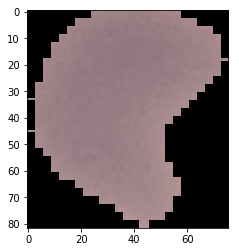

This Screening has tested negative.


In [41]:
parasite_detector(files[77])